In [16]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import os

In [3]:
columns=['X', 'Y','Classes']
data=pd.read_csv(r"C:\Users\SID13\Downloads\Two_points_KNN.csv",names=columns)

In [4]:
data

,X,Y,Classes
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0
5,-3.533291,6.424351,0
6,0.354240,7.932591,0
7,3.447913,-0.636150,0
8,9.242952,1.407496,0
9,6.475267,5.974660,0


In [22]:
x=data.iloc[:,:2]

In [23]:
x

,X,Y
0,-2.543456,-10.816358
1,9.434466,-2.572000
2,3.368646,-10.194671
3,1.341407,-4.204140
4,9.547758,-2.220580
5,-3.533291,6.424351
6,0.354240,7.932591
7,3.447913,-0.636150
8,9.242952,1.407496
9,6.475267,5.974660


In [25]:
y=data.iloc[:, 2:]

In [26]:
y

,Classes
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [44]:

knn = KNeighborsClassifier()


In [45]:
knn.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
prediction = knn.predict(x_test)

In [47]:
prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,

In [48]:
knn.score(x_test, y_test)

1.0

In [49]:
y_pred_prob = knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

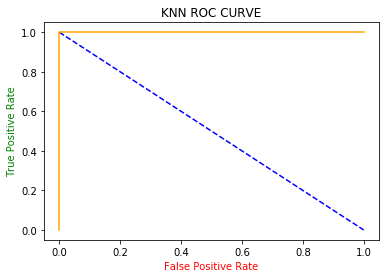

In [50]:
plt.plot([0,1], [1,0], 'k--',color='blue')
plt.plot(fpr,tpr,color='orange')
plt.xlabel('False Positive Rate',color='r')
plt.ylabel('True Positive Rate',color='g')
plt.title('KNN ROC CURVE')
plt.show()